# Authentication

In [ ]:
import tweepy
from tweepy import OAuthHandler

consumer_key = "" #API key

consumer_secret = "" #API Secret key

access_token = ""

access_token_secret = ""

screen_name = ""

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

# Multiple Tweet Retrieval

In [ ]:
import datetime
import time
import json
from google.colab import files
from tweepy import Cursor

!pip install xlsxwriter   # install library to write to native excel files
import xlsxwriter

     |████████████████████████████████| 153kB 4.8MB/s 


In [ ]:
tweets = []   # for demo purposes to clear the array after each run of the function

In [ ]:
import datetime

username = "ivankatrump"
startDate = datetime.datetime(2020, 12,20) #The date contains year, month, day, hour, minute, second, and microsecond.
endDate =   datetime.datetime(2021, 1, 5)

# This section is for you to learn about how the arrays in python function when using Tweepy
def queryTimeline():
  # always have to call it normally once to set starting point so the next while loop has somewhere to start from
  tmptweets = api.user_timeline(username, count=10)
  for twit in tmptweets:
    tweets.append(twit)
  
  while (tmptweets[-1].created_at > startDate): 
    # Because we only test validity of the while loop at the beginning, it is possible to retrieve a tweet that falls before startDate
    print("Last tweet at", tmptweets[-1].created_at," Retrieving more tweets")
    time.sleep(2)
    tmptweets = api.user_timeline(username, max_id=tmptweets[-1].id-1, count=10)
    for twit in tmptweets:
      tweets.append(twit)

  # for twit in tweets:
  #   print(twit.id, "|",twit.text)
    with open("tweets.json",'w') as f:
      for twit in tweets:
        f.write(json.dumps(twit._json))
    print("File created")
    # files.download("tweets.json")    # auto download created file by calling from files library

    wbook = xlsxwriter.Workbook("tweets.xlsx")
    wsheet = wbook.add_worksheet()
    row=0
    for twit in tweets:
        wsheet.write_string(row,0,str(twit.id))
        wsheet.write_string(row,1,str(twit.created_at))
        wsheet.write_string(row,2,str(twit.text))
        row+=1
    wbook.close()

    print("Excel file created")
# files.download("tweets.xlsx")

queryTimeline()

Last tweet at 2021-01-05 13:54:30  Retrieving more tweets
File created
Excel file created
Last tweet at 2021-01-03 17:13:31  Retrieving more tweets
File created
Excel file created
Last tweet at 2020-12-30 13:40:08  Retrieving more tweets
File created
Excel file created
Last tweet at 2020-12-28 19:32:55  Retrieving more tweets
File created
Excel file created
Last tweet at 2020-12-27 13:16:50  Retrieving more tweets
File created
Excel file created
Last tweet at 2020-12-24 15:07:37  Retrieving more tweets
File created
Excel file created
Last tweet at 2020-12-23 00:00:57  Retrieving more tweets
File created
Excel file created
Last tweet at 2020-12-21 23:48:44  Retrieving more tweets
File created
Excel file created
Last tweet at 2020-12-21 16:28:50  Retrieving more tweets
File created
Excel file created
Last tweet at 2020-12-20 14:29:07  Retrieving more tweets
File created
Excel file created


In [ ]:
print(tweets[0].id)
print(tweets[1].id)
print(tweets[-1].id)
print(tweets[-2].id)

1347339437617815552
1346916905093894144
1339575364562108416
1339681734787477505


In [ ]:
# This function tries to collect tweets from the username target in batches and saves to file
def dumpTimeline():
  username = "ivankatrump"
  fname="user_timeline_{}.json".format(username)
  
  print("Batch collection of timeline statuses for ", username)

  counter=0
  with open(fname,'w') as f:
    for page in Cursor(api.user_timeline, screen_name=username,count=50).pages(5):
      # for loops tries to download 50 statuses each batch but some tweets may be extended/have media and affect total number retrieved
      for status in page:
        f.write(json.dumps(status._json)+"\n")
        counter+=1
  print("Total %d User Timeline Tweets collected" % counter)

dumpTimeline()

Batch collection of timeline statuses for  ivankatrump
Total 246 User Timeline Tweets collected


In [ ]:
def userorbrandReferences():

  maxTweets = 300
  tweetsPerQry = 50
  tweetCount = 0
  fName = "bulktweets.json"
  searchQuery = "@ivankatrump" # note we are using search function and not timeline functions here, so I'm searching for mentions

  sinceId = None 
  maxid = -1

  print("Downloading max {0} tweets".format(maxTweets))

  with open(fName, 'w') as f:
      while tweetCount < maxTweets:
        time.sleep(5)
        try:
             if (maxid <= 0):
                   if (not sinceId):
                      new_tweets = api.search(q=searchQuery, count=tweetsPerQry)
                   else:
                      new_tweets = api.search(q=searchQuery, count=tweetsPerQry, since_id=sinceid)
             else:
                    if (not sinceId):
                      new_tweets = api.search(q=searchQuery, count=tweetsPerQry, max_id=str(maxid-1))
                    else:
                      new_tweets = api.search(q=searchQuery, count=tweetsPerQry, since_id=sinceid,  max_id=str(maxid-1))
             if not new_tweets:
                  print("No more tweets found")
                  break
             for tweet in new_tweets:
                  f.write(json.dumps(tweet._json))
             tweetCount += len(new_tweets)
             print("Downloaded {0} tweets".format(tweetCount))
             maxid = new_tweets[-1].id
        except tweepy.TweepError as e:
              # Just exit if any error
               print("some error : " + str(e))
               break

  print ("Downloaded {0} tweets, Saved to {1}".format(tweetCount, f))

userorbrandReferences()

Downloaded 41 tweets
Downloaded 82 tweets
Downloaded 116 tweets
Downloaded 151 tweets
Downloaded 190 tweets
Downloaded 231 tweets
Downloaded 271 tweets
Downloaded 313 tweets
Downloaded 313 tweets, Saved to <_io.TextIOWrapper name='bulktweets.json' mode='w' encoding='UTF-8'>


# Social Media Metrics

Based on the SMC, you already have some points of the compass covered - the first function focuses on audience profile (details) and audience size

In [ ]:
# learn the difference between friends and followers on Twitter
def getAudienceProfile():
  result = api.get_user("Periiii99")
  print(json.dumps(result._json, indent=3))

def getFriends():
  # result1= api.friends("Periiii99",count = 5 )
  with open("friend.json","w") as fw:
    for page in Cursor(api.friends,screen_name="Periiii99").pages(3):
      print("Retrieving 20 friends")
      time.sleep(3)
      for friends in page: #need extra loop to go through each obe=hect from page separately
        fw.write(json.dumps(friends._json) + "\n")

  # for user in result1:
  #  print(user.screen_name)

def getFollowers():
  # result1= api.friends("Periiii99",count = 5 )
  with open("followers.json","w") as fw:
    for pages in Cursor(api.followers,screen_name="Periiii99",count=20).pages(3):
      print("Retrieving 20 followers")
      time.sleep(2)
      for follower in pages: #need extra loop to go through each obe=hect from page separately
       fw.write(json.dumps(follower._json) + "\n")
      
# getAudienceProfile()
# getFriends()
getFollowers()

Retrieving 20 followers
Retrieving 20 followers
Retrieving 20 followers


In [ ]:
#reading from json file
# with open ("friend.json","r") as r:
#   for line in r:
#     friend = json.loads(line)
#     print(friend)

with open ("followers.json","r") as r:
  for line in r:
    friend = json.loads(line)
    print(friend)

{'id': 1330028187640877058, 'id_str': '1330028187640877058', 'name': 'WKSMMU', 'screen_name': 'wksmmu', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 86, 'friends_count': 81, 'listed_count': 0, 'created_at': 'Sat Nov 21 06:00:20 +0000 2020', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 9, 'lang': None, 'status': {'created_at': 'Fri Jan 08 06:12:44 +0000 2021', 'id': 1347425988423032833, 'id_str': '1347425988423032833', 'text': 'Noooo..... my favourite target for retrievals. 😂 https://t.co/Ks5TaoBlZE', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/Ks5TaoBlZE', 'expanded_url': 'https://twitter.com/TwitterSafety/status/1346970432017031178', 'display_url': 'twitter.com/TwitterSafety/…', 'indices': [49, 72]}]}, 'source': '<a href="https://mobile.twitter.com" rel="n

In [ ]:
# get profile statistics
def getProfStats():
  follower_file = "followers.json"
  friend_file = "friend.json"
  username = "Periiii99"

  with open(follower_file) as f1, open (friend_file) as f2:
    followers = []
    for line in f1 :
      obj = json.loads(line)
      followers.append(obj['screen_name'])

    friends = []
    for line in f2:
      obj = json.loads(line)
      friends.append(obj['screen_name'])

    mutual = [user for user in friends if user in followers]
    follower_not_following = [user for user in followers if user not in friends]
    friends_not_following = [user for user in friends if user not in followers] #they friend me but I  dont

    print("{} has {} followers".format(username,len(followers)))
    print("{} has {} friends".format(username,len(friends)))
    print("{} has {} mutual friends".format(username,len(mutual)))
    print("{} friends are not following {} back".format(len(friends_not_following), username)) 

getProfStats()

Periiii99 has 60 followers
Periiii99 has 55 friends
Periiii99 has 40 mutual friends
15 friends are not following Periiii99 back


This next function shows an example of content analysis to figure out top X of Y type of measurements. There are other content analysis operations (some have their own category like sentiment analysis)

In [ ]:
from collections import Counter

In [ ]:
# using saved JSON files from user_timelines identify the top mentions and hashtags used
def getHashes(tweet):
  entities = tweet.get('entities',{})
  hashes = entities.get('hashtags',[])
  return [tag['text'] for tag in hashes]

def getTopHashTags():
  result =api.user_timeline("McDMalaysia", count=50, tweet_mode="extended")
  htags = Counter()
  for twit in result:
    # print(twit.entities['hashtags'])
    htags.update(getHashes(twit._json))
  for tag, count in htags.most_common():
    print(tag,count)

def getTopMentions():
  print("something")


getTopHashTags()

ProsperityMcD 6
GoldenProsperityMcD 4
McCafeTwitterTeki 3
TooManyFavourites 1
DetikEmasSeleraEmas 1
02OJRN500 1
JOURNAKA 1
Hobi 1
Mekdi 1


Following function helps you identify number of likes per tweet then calculates the average for all the tweets collected

In [ ]:
def userTweetStats():
fav_count = []
  for twit in result:
    fav_count.append
  print("something")

Final function here is to calculate the responsiveness of an account (i.e. the speed of replies when mentioned

In [ ]:
#add code here

# targetacct = "@helpmeunifi"
replies = []

results = api.search("@helpmeunifi", count =20)
for twit in results:
  # print (twit.text,twit.id, twit.user.screen_name)
  tempsearch= api.search(twit.user.screen_name, count=50)
  for twut in tempsearch:
    if (twut.in_reply_to_status_id == twit.id):
      print("reply-found")
      print(twit.text, "|",twut.text)
      replies.append(twut.created_at - twit.created_at)
      break
for times in replies: 
  print(times)

reply-found
@helpmeunifi hi, i subs 500mbps but rarely dapat 500mbps? Can you help me. | @graybet4 Hi. Mind to PM us your account details for further checking, please. (We advise you not to reveal your ac… https://t.co/1J3thwq4Pi
reply-found
@helpmeunifi Kosong je | @wan_blm Hai @wan_blm. Sila semak DM anda. Terima kasih.
reply-found
@helpmeunifi saya stress la internet kejap ada kejap takde | @arisyahsoswift Hi. Boleh DM kami maklumat akaun untuk semakan lanjut? (Kami sarankan anda supaya tidak mendedahkan… https://t.co/6ehHoxm4JF
reply-found
@helpmeunifi why no internet meh ?!? | @zahargerimis Hi @zahargerimis. Apologize for any inconvenience caused. Kindly check your DM for further assistance. Thank you.
reply-found
@mrymrawr @unifi @helpmeunifi Ko rasaaa https://t.co/tKamQ5Mim4 | @aisyahhsamsudin Bole report cahhh. Call customer service. I did that last time dkt rmh, KL. Dorg akan reset
reply-found
@aisyahhsamsudin @unifi @helpmeunifi Kau check speed test dia ? | @mrymrawr @unifi @

# Data Visualization

Next is a simple function to display word frequency distribution of data obtained. There are many other ways to display your data and this is explored if further detail in VIP and is not covered here.

In [ ]:
import sys
import string
import json
from collections import Counter
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [ ]:
def process(text, tokenizer=TweetTokenizer(), stopwords=[]):   
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    return [tok for tok in tokens if tok not in stopwords and not tok.isdigit()]

In [ ]:
# import nltk
# nltk.download('stopwords')
# wordstop = set(stopwords.words('english'))
# print(wordstop)

# punct =list(string.punctuation)
# print(punct)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


[35, 33, 29, 25, 23, 20, 17, 17, 16, 15]
['🇸', '🇺', '@realdonaldtrump', 'president', 'georgia', 'jared', '@ivankatrump', 'peace', 'kushner', '“']
🇸: 35
🇺: 33
@realdonaldtrump: 29
president: 25
georgia: 23
jared: 20
@ivankatrump: 17
peace: 17
kushner: 16
“: 15
⁦: 15
trump: 14
great: 13
work: 13
⁩: 13
vaccine: 12
thank: 12
️: 12
first: 12
@aviberkow45: 11
american: 11
@perduesenate: 10
ever: 10
food: 9
@kloeffler: 9
today: 9
year: 9
us: 8
families: 8
america: 8
day: 8
signed: 8
🇮: 8
one: 7
congratulations: 7
@thehill: 7
proud: 7
1st: 7
🕊: 7
­: 7
🇱: 7
🇦: 7
women: 7
need: 6
saudi: 6
qatar: 6
deal: 6
vote: 6
administration: 6
‘: 6


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127480 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0, flags=flags)


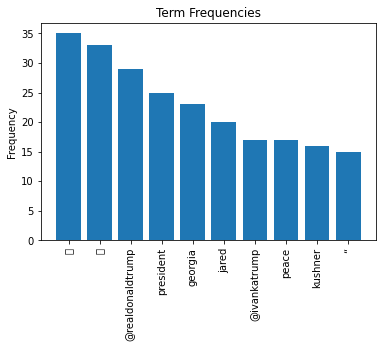

In [ ]:
def createFD():
    tweet_tokenizer = TweetTokenizer()
    punct = list(string.punctuation)
    stopword_list = stopwords.words('english') + punct + ['…', 'rt',"’"]

    fname = "user_timeline_ivankatrump.json"

    tf = Counter()
    with open(fname, 'r') as f:
        for line in f:
            tweet = json.loads(line)
            tokens = process(text=tweet.get('text', ''),
                            tokenizer=tweet_tokenizer,
                            stopwords=stopword_list)
            tf.update(tokens)

    y = [count for tag, count in tf.most_common(10)]
    print(y)

    terms = [t[0] for t in tf.most_common(10)]
    print(terms)
  
    x = range(1, len(y)+1)
    x_label = terms

    plt.bar(x, y, align='center')
    plt.xticks(x,x_label,rotation ='vertical')

    for tag, count in tf.most_common(50):
        print("{}: {}".format(tag, count))

    plt.title("Term Frequencies")
    plt.ylabel("Frequency")
    plt.savefig('term_distribution.png')
    plt.show()
    
    
createFD()